In [294]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [297]:
response = requests.get("https://www.saveecobot.com/storage/maps_data.js")

In [298]:
zone = requests.get('https://www.saveecobot.com/storage/polygons/polygon_radiation_chernobyl.json?ver=143')

In [299]:
zone2 = json.loads(zone.text)

r = len(zone2['features'][0]['geometry']['coordinates'][0][0])
p = zone2['features'][0]['geometry']['coordinates'][0][0]

In [300]:
locs = []

for i in json.loads(response.text):
    if "gamma" in i.keys():
        loc_dic = {}
        loc_dic['lat'] = i['a']
        loc_dic['lon'] = i['n']
        loc_dic['gamma'] = i['gamma']
        locs.append(loc_dic)
        
df = pd.DataFrame(locs)
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['gamma'] = df['gamma'].astype(float)

#df = df[(df['lat'] > lat_min-0.5) & (df['lat'] < lat_max+0.5)]
#df = df[(df['lon'] > lon_min-0.5) & (df['lon'] < lon_max+0.5)]
df = df[df['lat'] != df['lat'].min()]

In [301]:
#rads = [gamma if gamma < 12000 else 12000 for gamma in df['gamma']]
#df['gamma'] = rads

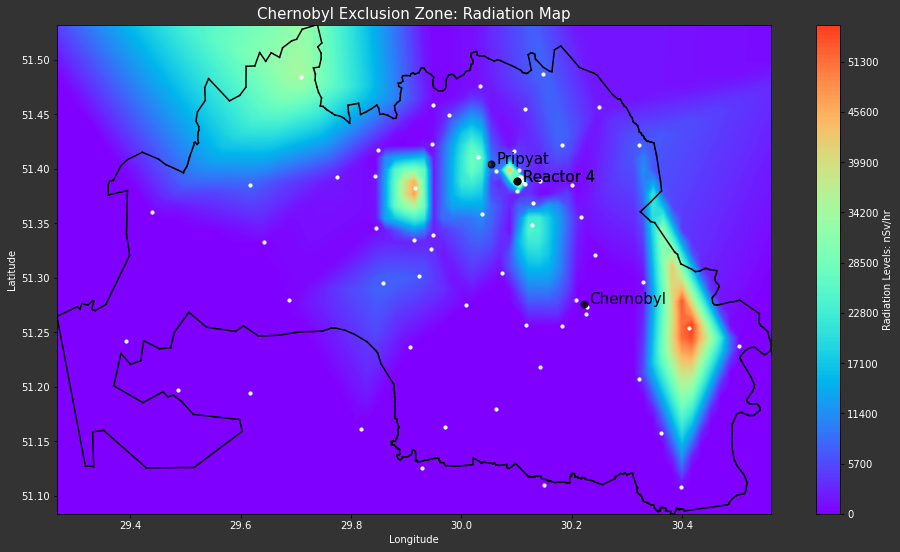

In [328]:
from PIL import Image
img = Image.open("chernobyl.JPG")


from scipy.interpolate import griddata
numcols, numrows = 1000, 1000

xi = np.linspace(df['lon'].min(), df['lon'].max(), numrows)
yi = np.linspace(df['lat'].min(), df['lat'].max(), numcols)

xi, yi = np.meshgrid(xi, yi)
x, y, z = df['lon'], df['lat'], df['gamma']

points = np.vstack((x,y)).T 
values = z
wanted = (xi, yi)
zi = griddata(points, values, wanted, method = 'linear') # for more info on griddata: http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html


fig, ax = plt.subplots(figsize=(16,9))
img = ax.contourf(xi, yi, zi, alpha = 1, levels = 500, zorder = 1, vmax = 60000, cmap = 'rainbow')
cb = plt.colorbar(img, ax=ax)
cb.set_label('Radiation Levels: nSv/hr', color='white')

plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')

ax.scatter(df['lon'], df['lat'], c = 'white', s=10)

for i in range(r-1):
    lon_min = min([lon_min,p[i][0], p[i+1][0]])
    lon_max = max([lon_max,p[i][0], p[i+1][0]])
    
    lat_min = min([lat_min,p[i][1], p[i+1][1]])
    lat_max = max([lat_max,p[i][1], p[i+1][1]])
    
    ax.plot([p[i][0], p[i+1][0]],
             [p[i][1], p[i+1][1]], color = 'k')
    
for lon, lat, gamma in df.values:
    #ax.annotate(f"{int(gamma)} nSv/hr", (lat+0.01, lon), color = 'black', size = 7)
    pass
#ax.set_xlim(lon_min-0.15, lon_max+0.15)
#ax.set_ylim(lat_min-0.15, lat_max+0.15)
    
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.title("Chernobyl Exclusion Zone: Radiation Map", color = 'white', fontsize=15)
plt.xlabel("Longitude", color = 'white')
plt.ylabel("Latitude", color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')

ax.annotate("Pripyat", xy=(30.0542+0.01,51.4045), color = 'black', fontsize=15)
ax.scatter(x = [30.0542], y =[51.4045], color = 'black',s = 50, alpha = 0.8)

ax.annotate("Reactor 4", xy=(30.101388888889+0.01,51.388333333333), color = 'black',  fontsize=15)
ax.scatter(x = [30.101388888889], y =[51.388333333333], color = 'black', s = 50, alpha = 0.8)


ax.annotate("Reactor 4", xy=(30.101388888889+0.01,51.388333333333), color = 'black',  fontsize=15)
ax.scatter(x = [30.101388888889], y =[51.388333333333], color = 'black', s = 50, alpha = 0.8)

ax.annotate("Chernobyl", xy =(30.2219+0.01, 51.2763), color = 'black', fontsize=15)
ax.scatter(x = [30.2219], y = [51.2763], color = 'black', s = 50, alpha = 0.8)

fig.patch.set_facecolor('#333333')
plt.show()